In [91]:
import pandas as pd
import sklearn.datasets as sds

In [92]:
raw_data    = sds.fetch_california_housing()
features_df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
target_df   = pd.DataFrame(raw_data.target, columns=raw_data.target_names)
df          = pd.concat([features_df, target_df], axis='columns')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [93]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score


In [96]:
def features_target_split(df):
    return ( df.iloc[:, :-1], df['MedHouseVal']  )

In [97]:
def train_regression_model(model, X, y, random_state=31337):
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=0.2)
  
  # >>> Обучение
  model.fit(X = X_train, y = y_train)
  
  # >>> Получение результатов
  train_predictions = model.predict(X_train) 
  test_predictions  = model.predict(X_test)
  
  return dict(
    model   = model, 
    data    = dict(
      train = dict( X = X_train,  y = y_train ),
      test  = dict( X = X_test,   y = y_test  )
    ),
    metrics = dict(
      train = dict(
        rmse = root_mean_squared_error(y_true=y_train, y_pred=train_predictions),
        r2   = r2_score(y_true=y_train, y_pred=train_predictions)
      ),
      test = dict(
        rmse = root_mean_squared_error(y_true=y_test, y_pred=test_predictions),
        r2   = r2_score(y_true=y_test, y_pred=test_predictions)
      )
    )
  )

In [98]:
def metrics_as_df(d, model_name, description = ''):
  mdf = pd.DataFrame(
    columns=['MODEL', 'DESC', 'RMSE test','RMSE train',  'R2 test', 'R2 train'],
    data=[ [
      model_name, 
      description, 
      d['test']['rmse'], 
      d['train']['rmse'],
      d['test']['r2'],
      d['train']['r2'] 
    ]])
  return mdf

In [99]:
base_mobel        = LinearRegression()
features, target  = features_target_split(df)
base_model_result = train_regression_model(base_mobel, features, target)
base_metrics      = metrics_as_df( base_model_result['metrics'] , 'base', 'Все признаки разом, без обработки')
base_metrics

,MODEL,DESC,RMSE test,RMSE train,R2 test,R2 train
0,base,"Все признаки разом, без обработки",0.7703,0.715891,0.5581,0.614298


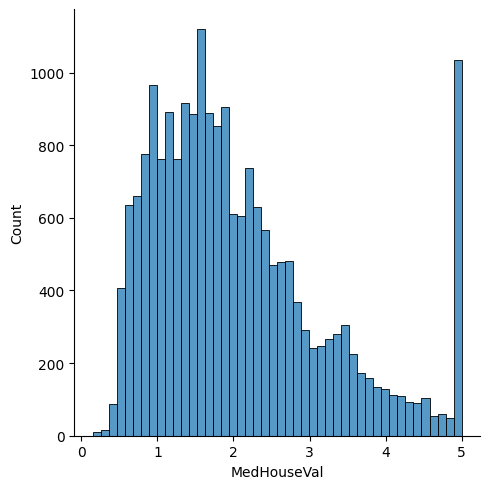

In [100]:
import seaborn as sns

sns.displot(target, kind='hist')

<Axes: >

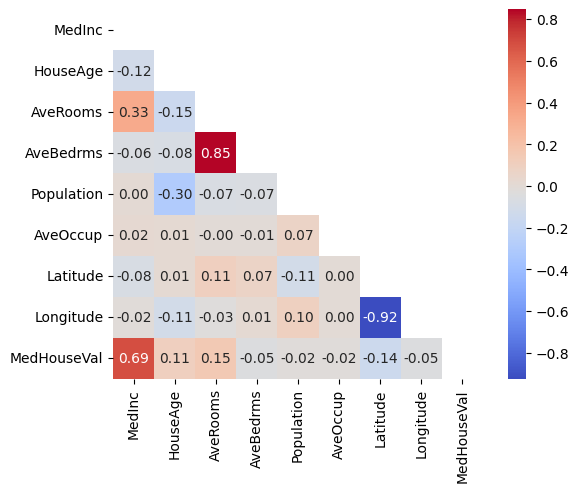

In [101]:
import numpy as np
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", mask=np.triu(np.ones_like(corr, dtype=bool)) , square=True,  cmap= 'coolwarm')


In [102]:
cor_no_adjust_columns       = ['MedInc', 'AveRooms', 'HouseAge']
cor_no_adjust_model         = LinearRegression()
cor_no_adjust_train_results = train_regression_model(cor_no_adjust_model, X=df[cor_no_adjust_columns], y=df['MedHouseVal'], random_state=31337)
cor_no_adjust_metrics       = metrics_as_df( cor_no_adjust_train_results['metrics'] , 'cor_no_adjust', 'Кореллированные признаки, без обработки')

pd.concat([
    base_metrics, 
    cor_no_adjust_metrics
])

,MODEL,DESC,RMSE test,RMSE train,R2 test,R2 train
0,base,"Все признаки разом, без обработки",0.770300,0.715891,0.558100,0.614298
0,cor_no_adjust,"Кореллированные признаки, без обработки",0.830475,0.799871,0.486361,0.518499


In [103]:
# COR_ADJUST
# Линейная модель на кореллированных признаках с обработкой

cor_adjust_feats        = ['MedInc', 'AveRooms', 'HouseAge']
cor_adjust_target       = ['MedHouseVal']
cor_adjust_all_columns  = cor_adjust_feats + cor_adjust_target
cor_adjust_df           = df[ cor_adjust_all_columns ].copy()

<Axes: >

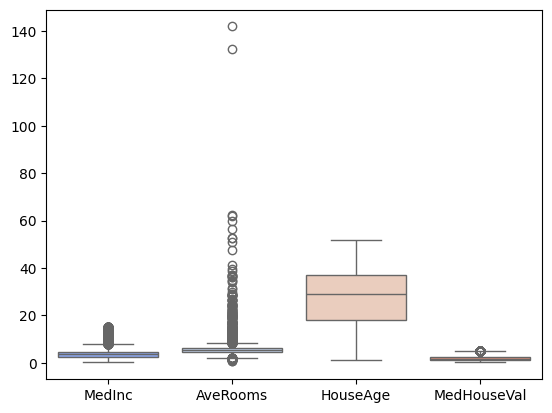

In [104]:
# COR_ADJUST
# EDA и обработка признаков

sns.boxplot( cor_adjust_df, palette='coolwarm' )

In [105]:
from sklearn.ensemble import IsolationForest

outlier_clf = IsolationForest(random_state=31337)
outlier_clf.fit(cor_adjust_df)
cor_adjust_df['outlier'] = outlier_clf.predict(cor_adjust_df)
cor_adjust_df = cor_adjust_df[cor_adjust_df['outlier'] == 1]

In [106]:
# COR_ADJUST
# Обучение 

X = cor_adjust_df[ cor_adjust_feats  ]
y = cor_adjust_df[ cor_adjust_target ]

cor_adjust_model         = LinearRegression()
cor_adjust_train_results = train_regression_model(cor_adjust_model, X, y, random_state=31337)
cor_adjust_metrics       = metrics_as_df( cor_adjust_train_results['metrics'] , 'cor_adjust', 'Коррелированные признаки + обработка')

cor_adjust_metrics

,MODEL,DESC,RMSE test,RMSE train,R2 test,R2 train
0,cor_adjust,Коррелированные признаки + обработка,0.583906,0.577976,0.457633,0.452222


In [107]:
# Сравнение результатов

pd.concat([
  base_metrics, 
  cor_no_adjust_metrics,
  cor_adjust_metrics
])

,MODEL,DESC,RMSE test,RMSE train,R2 test,R2 train
0,base,"Все признаки разом, без обработки",0.770300,0.715891,0.558100,0.614298
0,cor_no_adjust,"Кореллированные признаки, без обработки",0.830475,0.799871,0.486361,0.518499
0,cor_adjust,Коррелированные признаки + обработка,0.583906,0.577976,0.457633,0.452222


Выводы:

- работа с выбросами помогла значительно улучшить качество модели
- только коррелированных признаков оказалось недостаточно для улучшения качества модели